# AI assignment

__Prompt__ : I have a task for you. I am working on an EDA project and I want you to write the code for me. The file is named card_transdata.csv and  first upload it and see the top lines of the file. Remember to import all the tools we are going to use later.

__Gemini 2.5 Pro__ : 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- Setup ---
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set default styling for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("--- EDA Script Initialized: All necessary libraries imported. ---")

def load_and_display_head(filepath):
    """
    Loads a CSV file into a pandas DataFrame and prints its first 5 rows.

    Args:
        filepath (str): The path to the CSV file.
    """
    try:
        # Load the dataset
        df = pd.read_csv(filepath)
        
        # Display the first 5 rows of the dataframe
        print(f"\nSuccessfully loaded '{filepath}'.")
        print("--- First 5 rows of the dataset: ---")
        print(df.head())
        
        # Return the dataframe for further use
        return df

    except FileNotFoundError:
        print(f"\n--- ERROR ---")
        print(f"File not found at path: '{filepath}'")
        print("Please make sure 'card_transdata.csv' is in the same directory as this script,")
        print("or provide the correct full path to the file.")
        return None
    except Exception as e:
        print(f"\n--- ERROR ---")
        print(f"An error occurred while loading the file: {e}")
        return None

# --- Main execution ---
if __name__ == "__main__":
    # Define the file path
    file_path = 'card_transdata.csv'
    
    # Call the function to load and display the data
    dataframe = load_and_display_head(file_path)
    
    if dataframe is not None:
        print("\n--- Next steps suggestion: ---")
        print("You can now proceed with further EDA steps, such as:")
        print("1.  `dataframe.info()` - To check data types and non-null counts.")
        print("2.  `dataframe.describe()` - For statistical summary of numerical features.")
        print("3.  `dataframe.isnull().sum()` - To check for missing values.")


--- EDA Script Initialized: All necessary libraries imported. ---

Successfully loaded 'card_transdata.csv'.
--- First 5 rows of the dataset: ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0    

__Prompt__: Now I want to know the shape info and describe of the csv file

__Gemini 2.5 Pro__: 

In [2]:
# --- 1. Show Shape ---
print("\n--- Dataset Shape ---")
print(f"Rows: {dataframe.shape[0]}, Columns: {dataframe.shape[1]}")

# --- 2. Show Info ---
print("\n--- Dataset Info (Data Types & Non-Null Counts) ---")
dataframe.info()

# --- 3. Show Describe ---
print("\n--- Statistical Summary (Numerical Features) ---")
# Using .T to transpose for better readability
print(dataframe.describe().T)


--- Dataset Shape ---
Rows: 999, Columns: 8

--- Dataset Info (Data Types & Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB

--- Statistical Summary (Numerical Features) ---
                                count       mean        std       min  \
distance_from_

__Prompt__: The next step is to clean the data. Give me the code for the number of missing value in each column, then drop those rows, see the new shape after dropping, see the first few rows of the file again

__Gemini 2.5 Flash__: 

In [3]:
# --- 4. Check and Handle Missing Values ---
print("--- Missing Values Count per Column ---")
missing_count = dataframe.isnull().sum()
print(missing_count)

# Drop rows where any value is missing (assuming it's safe to drop rows for this EDA)
# We use inplace=True to modify the original DataFrame
initial_shape = dataframe.shape
dataframe.dropna(inplace=True)

# Display the new shape and the number of dropped rows
print("\n--- Rows with Missing Values Dropped ---")
print(f"Initial Shape: {initial_shape}")
print(f"New Shape After Dropping NaNs: {dataframe.shape}")
print(f"Rows Dropped: {initial_shape[0] - dataframe.shape[0]}")

# Display the first few rows of the cleaned data
print("\n--- First 5 rows of the Cleaned Dataset: ---")
print(dataframe.head())

--- Missing Values Count per Column ---
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64

--- Rows with Missing Values Dropped ---
Initial Shape: (999, 8)
New Shape After Dropping NaNs: (977, 8)
Rows Dropped: 22

--- First 5 rows of the Cleaned Dataset: ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
3                

__Prompt__: Now is the part for data visualization, I want a distribution showing the class, the used pin number, repeat retailer, online orders, ratio to median purchase price. 5 graphs in total

__Gemini 2.5 Flash__: 

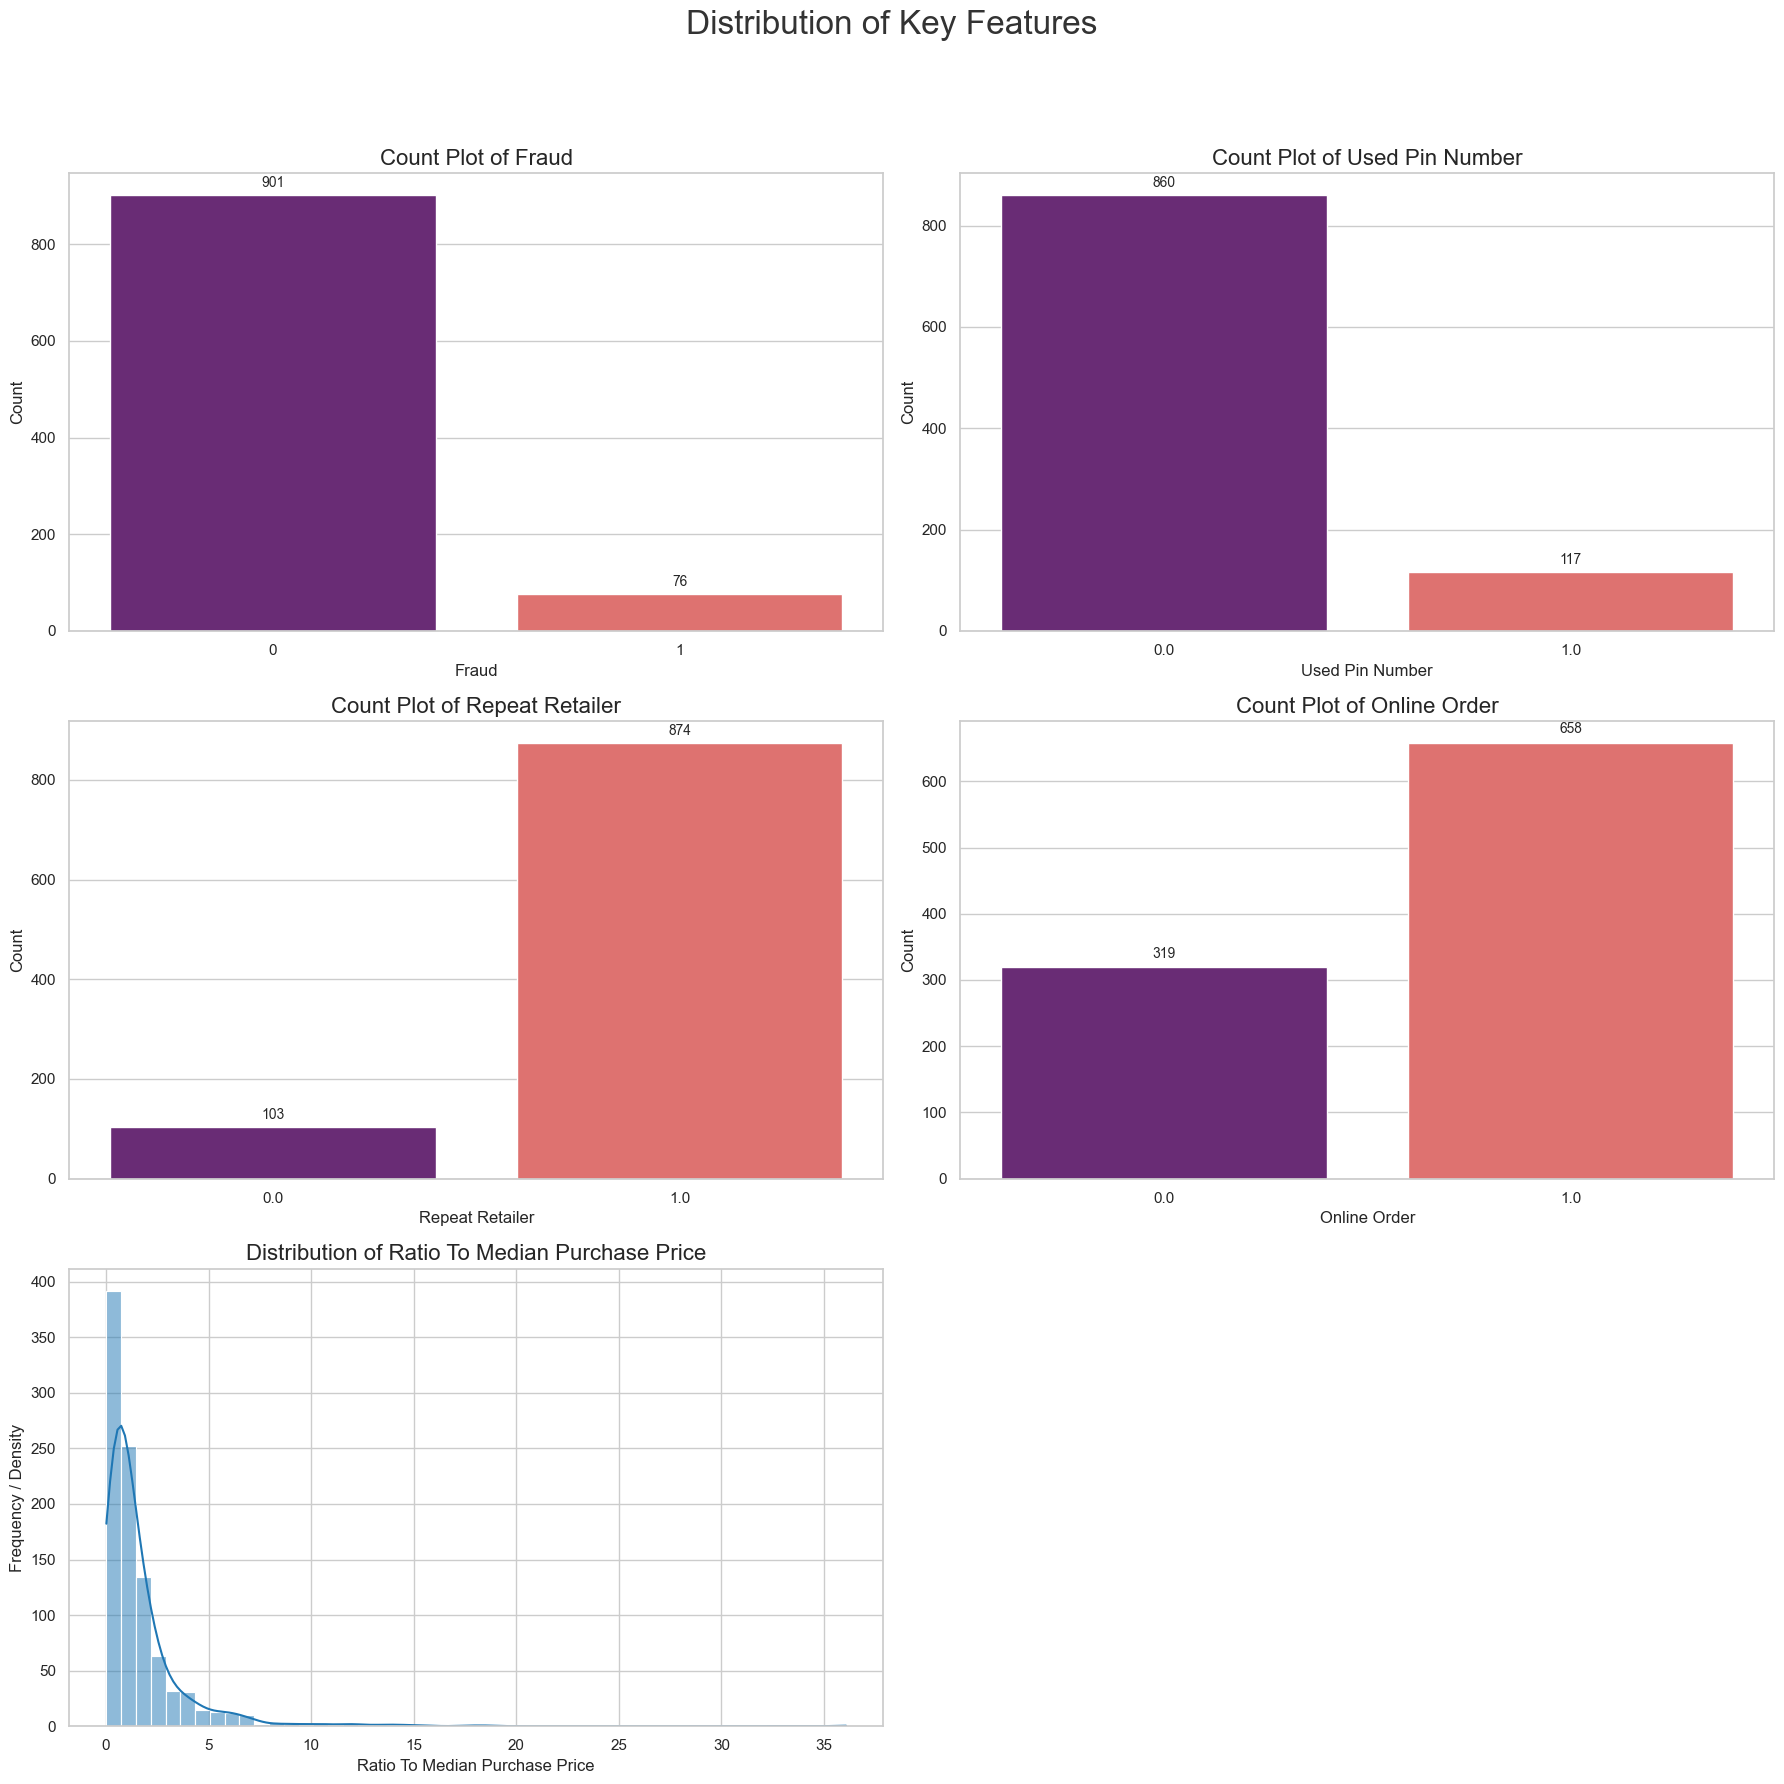

In [4]:
# --- 5. Data Visualization: Feature Distributions ---

# List of features to plot
binary_features = ['fraud', 'used_pin_number', 'repeat_retailer', 'online_order']
continuous_feature = 'ratio_to_median_purchase_price'

# Create a figure with 5 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
plt.suptitle('Distribution of Key Features', fontsize=24, y=1.02, color='#333333') # Title for the whole figure

# Plot binary features using countplots
for i, feature in enumerate(binary_features):
    row = i // 2
    col = i % 2
    
    # Use 'viridis' palette for a professional look
    sns.countplot(x=feature, data=dataframe, palette='magma', ax=axes[row, col])
    
    # Add title and labels
    axes[row, col].set_title(f'Count Plot of {feature.replace("_", " ").title()}', fontsize=16)
    axes[row, col].set_xlabel(feature.replace("_", " ").title(), fontsize=12)
    axes[row, col].set_ylabel('Count', fontsize=12)
    
    # Annotate bars with counts
    for p in axes[row, col].patches:
        height = p.get_height()
        axes[row, col].text(p.get_x() + p.get_width() / 2., height + 10, 
                f'{int(height)}', 
                ha='center', va='bottom', fontsize=10)

# Plot the continuous feature using a histogram
sns.histplot(dataframe[continuous_feature], kde=True, bins=50, color='#1f77b4', ax=axes[2, 0])
axes[2, 0].set_title(f'Distribution of {continuous_feature.replace("_", " ").title()}', fontsize=16)
axes[2, 0].set_xlabel(continuous_feature.replace("_", " ").title(), fontsize=12)
axes[2, 0].set_ylabel('Frequency / Density', fontsize=12)

# Hide the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
plt.show()

__Prompt__: Now is the Bivariate Visualizations. I want you to give me the bar plot graphs of numbers of PIN and Fraudulent, and percentage of PIN and Fraudulent, and number of chip and fraud, percentage of chip and fraud, online order and fraud numbers and percentage, scatter plot of fraud and non-fraud and distance from home and ratio of price, scatter plot of fraud and non-fraud and distance from last transaction and ratio of price. There are 8 plots in total.

__Gemini 2.5 Flash__:

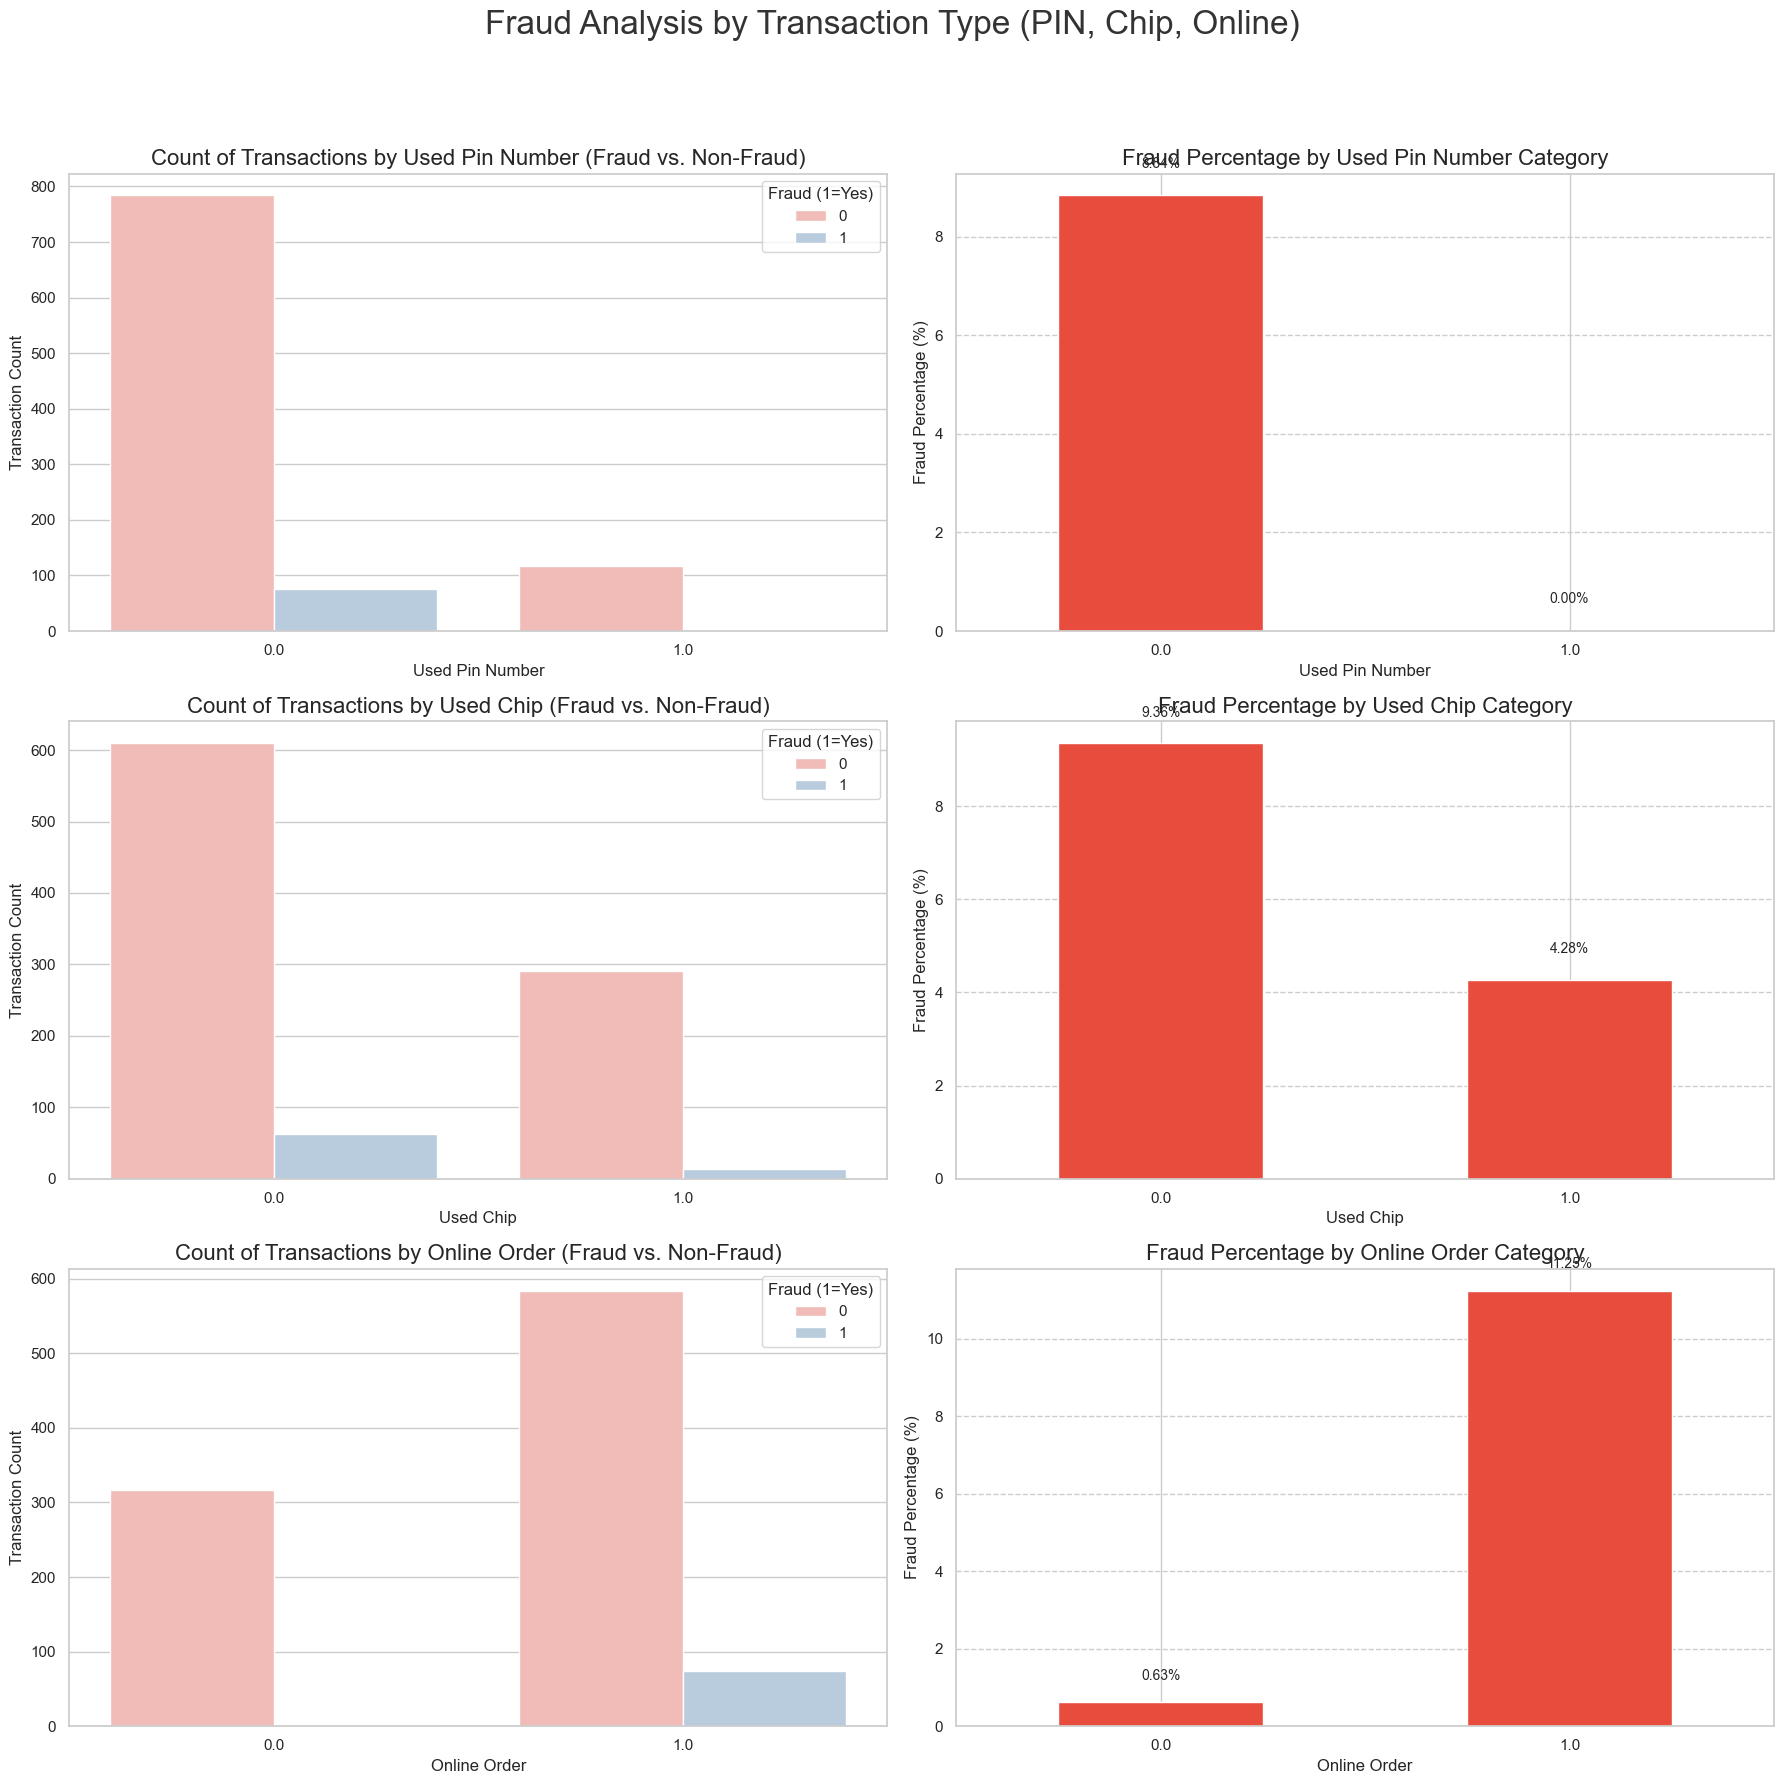

In [5]:
# --- 6A. Bivariate Visualizations: Categorical vs. Fraud ---

binary_features = ['used_pin_number', 'used_chip', 'online_order']

fig, axes = plt.subplots(nrows=len(binary_features), ncols=2, figsize=(18, 18))
plt.suptitle('Fraud Analysis by Transaction Type (PIN, Chip, Online)', fontsize=24, y=1.02, color='#333333')

for i, feature in enumerate(binary_features):
    # Calculate counts for the left column (Number of transactions)
    # Using 'Pastel1' palette for count plots
    sns.countplot(x=feature, hue='fraud', data=dataframe, palette='Pastel1', ax=axes[i, 0])
    axes[i, 0].set_title(f'Count of Transactions by {feature.replace("_", " ").title()} (Fraud vs. Non-Fraud)', fontsize=16)
    axes[i, 0].set_xlabel(feature.replace("_", " ").title(), fontsize=12)
    axes[i, 0].set_ylabel('Transaction Count', fontsize=12)
    axes[i, 0].legend(title='Fraud (1=Yes)', loc='upper right')
    
    # Calculate percentages for the right column (Percentage of Fraud)
    # 1. Group by the feature and the target, then unstack to get counts
    df_count = dataframe.groupby([feature, 'fraud']).size().unstack(fill_value=0)
    # 2. Calculate the percentage of fraud (column 1) within each feature category
    df_pct = df_count.apply(lambda x: x / x.sum(), axis=1) * 100
    
    # Plot the percentage of fraud
    df_pct[1].plot(kind='bar', ax=axes[i, 1], color='#e74c3c') # Red color for Fraud Percentage
    axes[i, 1].set_title(f'Fraud Percentage by {feature.replace("_", " ").title()} Category', fontsize=16)
    axes[i, 1].set_xlabel(feature.replace("_", " ").title(), fontsize=12)
    axes[i, 1].set_ylabel('Fraud Percentage (%)', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=0)
    axes[i, 1].grid(axis='y', linestyle='--')
    
    # Annotate bars with percentage values
    for p in axes[i, 1].patches:
        height = p.get_height()
        axes[i, 1].text(p.get_x() + p.get_width() / 2., height + 0.5, 
                f'{height:.2f}%', 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Note: Dataset is small; plotting all rows.


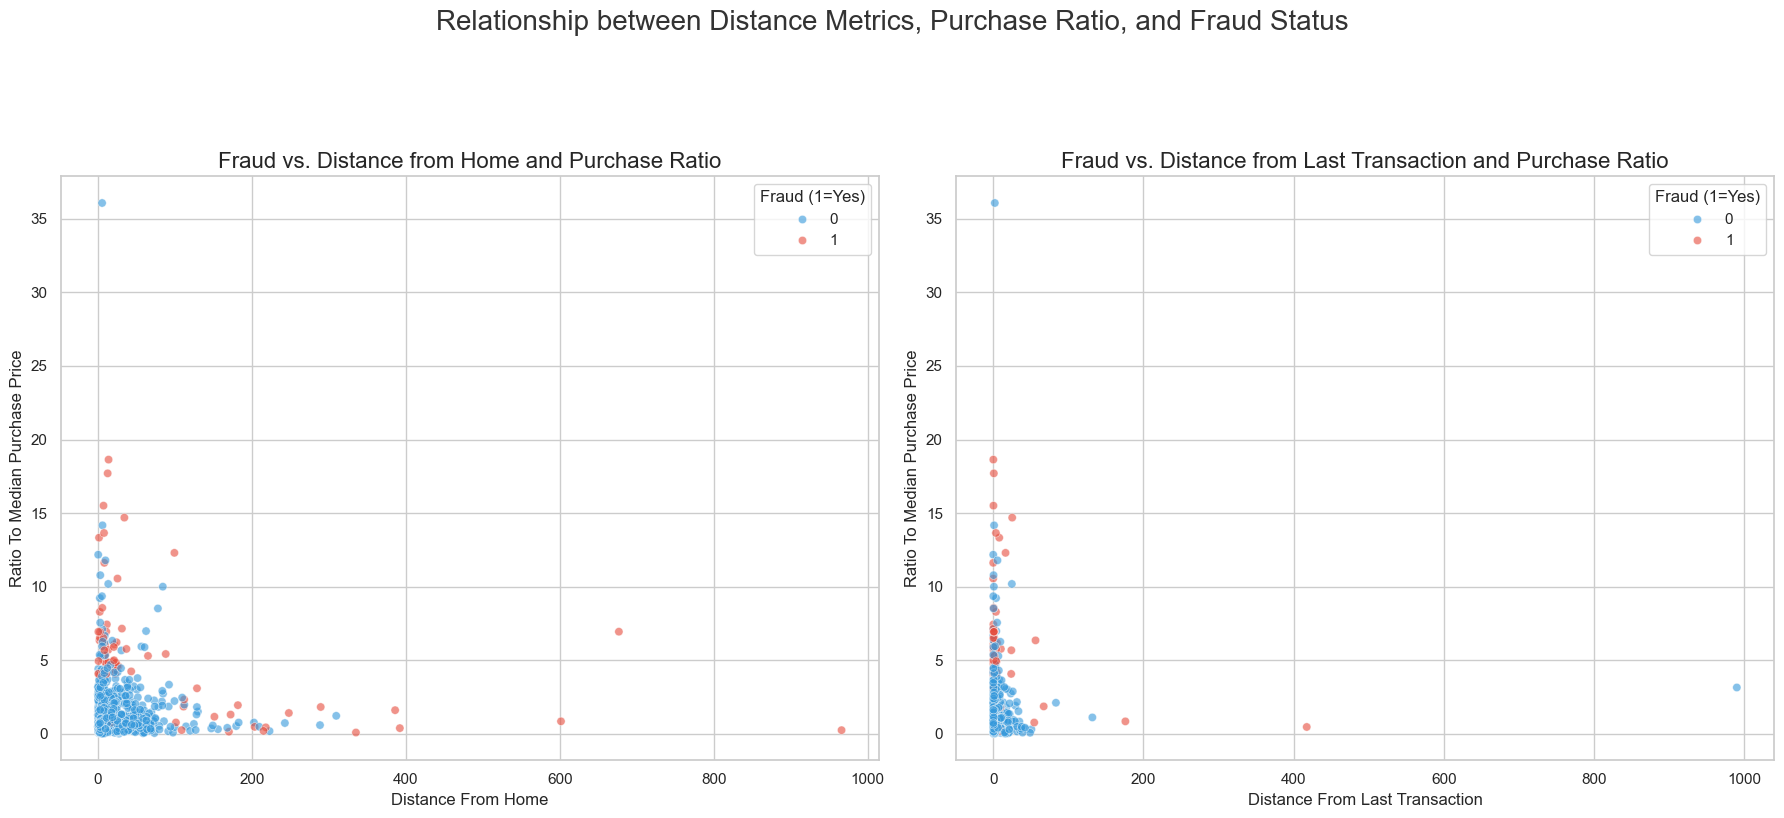

In [6]:
# --- 6B. Bivariate Visualizations: Continuous vs. Fraud (Scatter Plots) ---

# Define features for the scatter plots
distance_features = ['distance_from_home', 'distance_from_last_transaction']
ratio_feature = 'ratio_to_median_purchase_price'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plt.suptitle('Relationship between Distance Metrics, Purchase Ratio, and Fraud Status', fontsize=20, y=1.05, color='#333333')

# --- FIX: Dynamic Sampling Logic ---
# Calculate a safe sample size. We aim for 100,000, but take the full size if it's less.
sample_size = min(len(dataframe), 100000)

if sample_size > 1000: # Ensure we only sample if the DataFrame is large enough to benefit
    sample_df = dataframe.sample(n=sample_size, random_state=42)
    print(f"Note: Sampled {sample_size} rows for plotting efficiency.")
else:
    sample_df = dataframe
    print("Note: Dataset is small; plotting all rows.")
# --- END FIX ---


# Plot 1: Distance from Home vs. Ratio to Median Purchase Price, colored by Fraud
sns.scatterplot(
    x='distance_from_home', 
    y=ratio_feature, 
    hue='fraud', 
    data=sample_df, 
    palette=['#3498db', '#e74c3c'], # Blue for Non-Fraud, Red for Fraud
    alpha=0.6, 
    ax=axes[0]
)
axes[0].set_title('Fraud vs. Distance from Home and Purchase Ratio', fontsize=16)
axes[0].set_xlabel('Distance From Home', fontsize=12)
axes[0].set_ylabel(ratio_feature.replace("_", " ").title(), fontsize=12)
axes[0].legend(title='Fraud (1=Yes)')


# Plot 2: Distance from Last Transaction vs. Ratio to Median Purchase Price, colored by Fraud
sns.scatterplot(
    x='distance_from_last_transaction', 
    y=ratio_feature, 
    hue='fraud', 
    data=sample_df, 
    palette=['#3498db', '#e74c3c'], # Blue for Non-Fraud, Red for Fraud
    alpha=0.6, 
    ax=axes[1]
)
axes[1].set_title('Fraud vs. Distance from Last Transaction and Purchase Ratio', fontsize=16)
axes[1].set_xlabel('Distance From Last Transaction', fontsize=12)
axes[1].set_ylabel(ratio_feature.replace("_", " ").title(), fontsize=12)
axes[1].legend(title='Fraud (1=Yes)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()